# 📊 Análisis Exploratorio de Datos (EDA)
## Dataset: All Electronics

Este notebook analiza el dataset de **All Electronics** adaptado a sus columnas reales.

Rustam, E. (2022). All Electronics [Conjunto de datos]. Kaggle. https://www.kaggle.com/datasets/elvinrustam/electronics-dataset

Incluye:
- Exploración básica de los datos.
- Análisis de productos y categorías.
- Gráficos descriptivos con **pandas + matplotlib**.
- Interpretación paso a paso.

---

## 1️. Importar librerías

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de estilo gráfico
plt.style.use('ggplot')
%matplotlib inline

## 2. Cargar dataset

In [11]:
df = pd.read_csv('All Electronics.csv')
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,"Redmi 10 Power (Power Black, 8GB RAM, 128GB St...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81eM15lVcJ...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.0,965,"₹10,999","₹18,999"
1,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71AvQd3Vzq...,https://www.amazon.in/OnePlus-Nord-Lite-128GB-...,4.3,"113,956","₹18,999","₹19,999"
2,OnePlus Bullets Z2 Bluetooth Wireless in Ear E...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/51UhwaQXCp...,https://www.amazon.in/Oneplus-Bluetooth-Wirele...,4.2,"90,304","₹1,999","₹2,299"
3,"Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/81I3w4J6yj...,https://www.amazon.in/Samsung-Mystique-Storage...,4.1,"24,863","₹15,999","₹24,999"
4,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...","tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/71V--WZVUI...,https://www.amazon.in/OnePlus-Nord-Black-128GB...,4.3,"113,956","₹18,999","₹19,999"


## 3️. Exploración inicial

In [12]:
# Dimensiones del dataset
df.shape

(9600, 9)

In [13]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9600 entries, 0 to 9599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            9600 non-null   object
 1   main_category   9600 non-null   object
 2   sub_category    9600 non-null   object
 3   image           9600 non-null   object
 4   link            9600 non-null   object
 5   ratings         9505 non-null   object
 6   no_of_ratings   9505 non-null   object
 7   discount_price  9116 non-null   object
 8   actual_price    9530 non-null   object
dtypes: object(9)
memory usage: 675.1+ KB


In [14]:
# Estadísticas descriptivas
df.describe(include='all')

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,9600,9600,9600,9600,9600,9505,9505,9116,9530
unique,8800,1,1,9321,9600,39,3455,1608,1068
top,TAGG Verve Sense Smartwatch with 1.70'' Large ...,"tv, audio & cameras",All Electronics,https://m.media-amazon.com/images/I/61ARj+szfW...,https://www.amazon.in/Redmi-Power-Black-128GB-...,4.3,1,₹299,₹999
freq,9,9600,9600,7,1,1310,51,481,1540


## 4️. Análisis gráfico con pandas + matplotlib

### 🔹 Productos con más reseñas (popularidad)
Usaremos la columna `no_of_ratings` para identificar los productos con mayor interacción de usuarios.

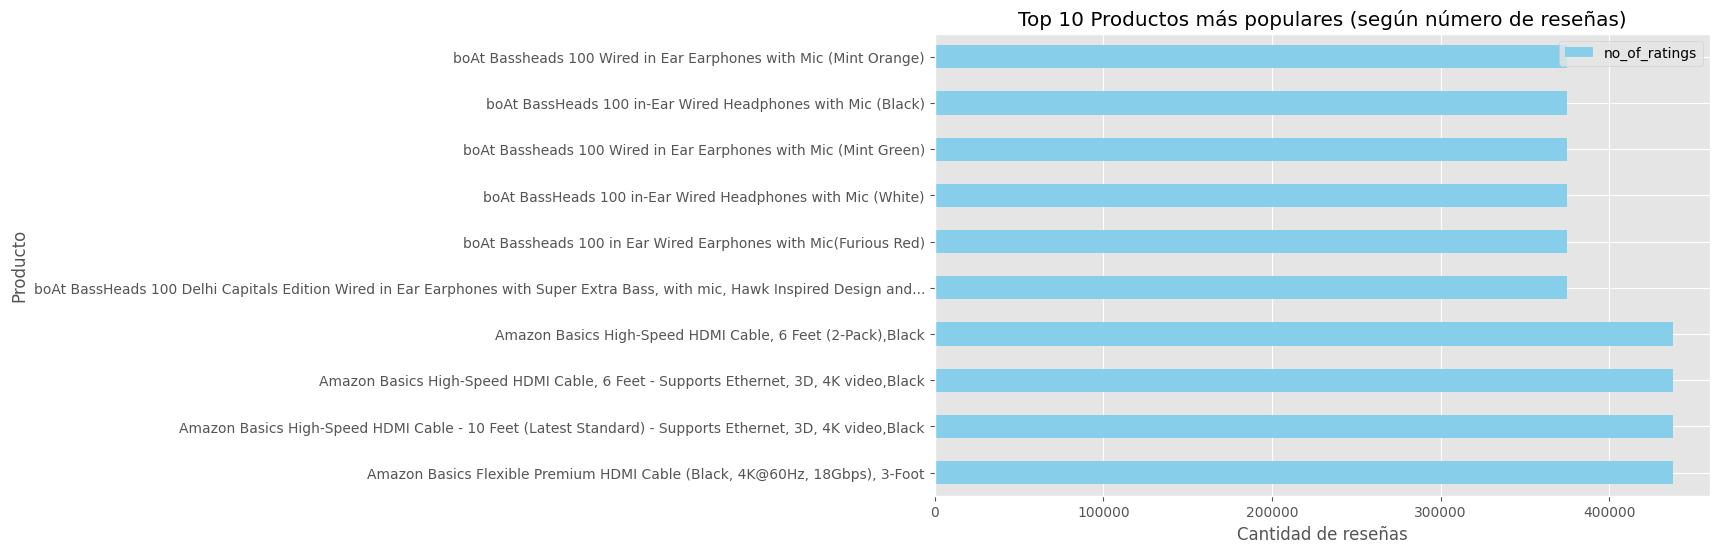

In [15]:
# Convertir la columna 'no_of_ratings' a número
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].astype(str).str.replace('[^0-9]', '', regex=True), errors='coerce')

# Graficar
top_rated = df.sort_values(by='no_of_ratings', ascending=False).head(10)
top_rated.plot(kind='barh', x='name', y='no_of_ratings', figsize=(10,6), color='skyblue')
plt.title('Top 10 Productos más populares (según número de reseñas)')
plt.xlabel('Cantidad de reseñas')
plt.ylabel('Producto')
plt.show()


 **Interpretación**: Este gráfico muestra qué productos reciben más reseñas, lo cual refleja tanto popularidad como confianza del público. Un mayor número de reseñas suele indicar un volumen alto de ventas.

### 🔹 Distribución de categorías principales

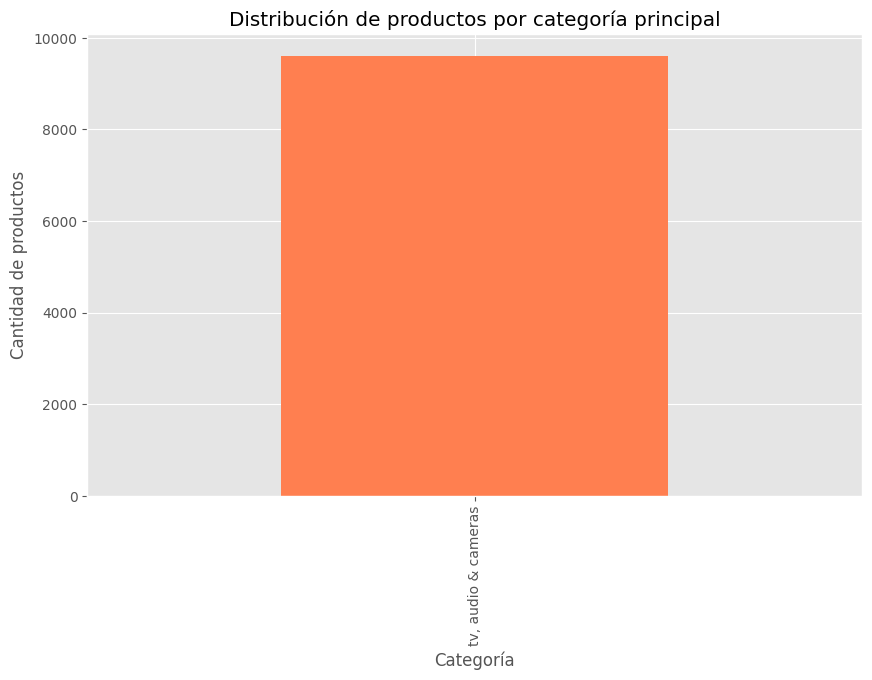

In [16]:
df['main_category'].value_counts().head(10).plot(kind='bar', figsize=(10,6), color='coral')
plt.title('Distribución de productos por categoría principal')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de productos')
plt.show()

 **Interpretación**: Permite identificar qué categorías concentran más productos en el catálogo. Esto ayuda a entender en qué segmentos se especializa la tienda.

### 🔹 Relación entre precio real y precio con descuento

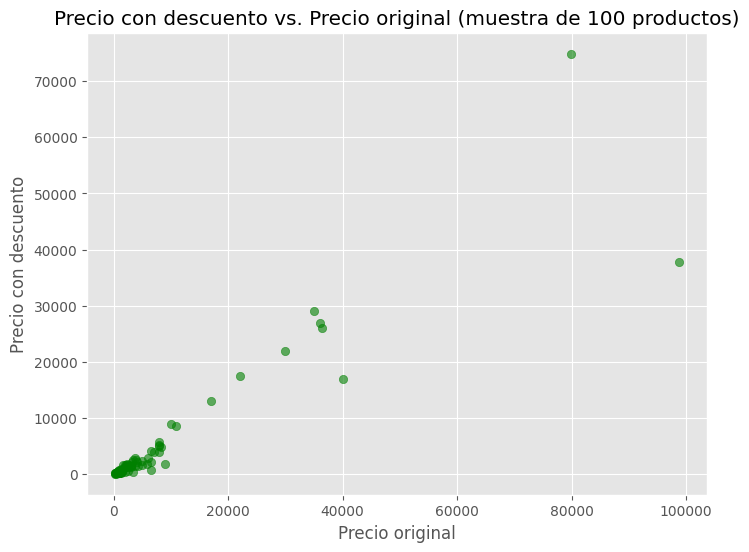

In [17]:
# Convertir precios a numéricos eliminando símbolos si es necesario
df['discount_price'] = pd.to_numeric(df['discount_price'].astype(str).str.replace('[^0-9.]','', regex=True), errors='coerce')
df['actual_price'] = pd.to_numeric(df['actual_price'].astype(str).str.replace('[^0-9.]','', regex=True), errors='coerce')

sample_prices = df.dropna(subset=['discount_price','actual_price']).sample(100, random_state=1)
plt.figure(figsize=(8,6))
plt.scatter(sample_prices['actual_price'], sample_prices['discount_price'], alpha=0.6, color='green')
plt.title('Precio con descuento vs. Precio original (muestra de 100 productos)')
plt.xlabel('Precio original')
plt.ylabel('Precio con descuento')
plt.show()

**Interpretación**: El gráfico de dispersión muestra cómo varían los descuentos. Si los puntos se alinean cerca de la diagonal, significa que el descuento es bajo; si caen mucho más abajo, los productos tienen rebajas significativas.

### 🔹 Relación entre calificación y número de reseñas

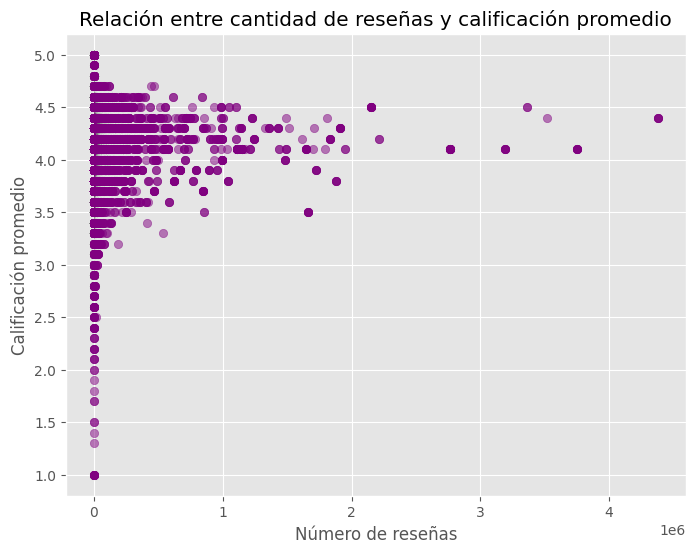

In [18]:
# Asegurar que ratings y no_of_ratings sean numéricos
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].astype(str).str.replace('[^0-9]', '', regex=True), errors='coerce')
df['ratings'] = pd.to_numeric(df['ratings'].astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')

# Graficar
plt.figure(figsize=(8,6))
plt.scatter(df['no_of_ratings'], df['ratings'], alpha=0.5, color='purple')
plt.title('Relación entre cantidad de reseñas y calificación promedio')
plt.xlabel('Número de reseñas')
plt.ylabel('Calificación promedio')
plt.show()


 **Interpretación**: Productos con muchas reseñas y calificaciones altas son los más confiables. Si un producto tiene pocas reseñas, la calificación puede no ser representativa. Si hay muchos con bajas calificaciones, puede señalar problemas de calidad.

## Conclusiones generales
- Se identificaron los productos más populares según reseñas.
- Se analizaron las categorías con mayor presencia en el catálogo.
- Se estudió la relación entre precios originales y con descuento.
- Se evaluó la confiabilidad de las calificaciones en relación con el número de reseñas.

Este análisis ayuda a comprender mejor la estrategia de ventas de la tienda y los patrones de consumo de los clientes.